データサイエンス特論授業課題第5回
作成日: 2022年7月15日
作成者: M1 203324 紺谷優志

IRISのデータに対し、k-meansクラスタリングを行い、purity値を計算する。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
from sklearn.datasets import load_iris  # irisデータセットをロード
from sklearn.cluster import KMeans 

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) #irisデータをpandasに変換
label=pd.Series(data=iris.target) # ラベル名を別のDataFrameで管理

In [2]:
#クラスタ数3でk-meansクラスタリングを実行
kmeans_model=KMeans(n_clusters=3)
kmeans_model.fit(df.values)

KMeans(n_clusters=3)

In [3]:
#分類の実行結果を表示
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

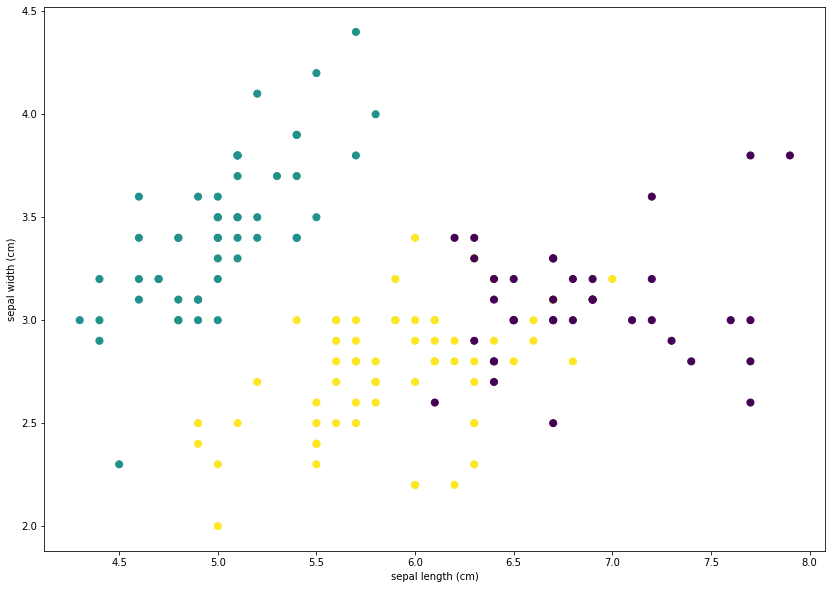

In [10]:
plt.figure(figsize=(14,10))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kmeans_model.labels_,s=50)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [66]:
#Cross Tableを作成
crosstab=pd.crosstab(label,kmeans_model.labels_)
crosstab

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [67]:
#Cross Tableを用いてpurity値を計算
tmp=.0
for i in range(len(crosstab.columns.values)):
    tmp+=max(crosstab.values[i])
purity=tmp/len(df.values)
print("purity: ",purity)

purity:  0.8933333333333333
